In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
data = pd.read_csv("movies.csv")

In [3]:
data.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0


year                int64
imdb               object
title              object
test               object
clean_test         object
binary             object
budget              int64
domgross          float64
intgross          float64
code               object
budget_2013$        int64
domgross_2013$    float64
intgross_2013$    float64
period code       float64
decade code       float64
dtype: object

In [4]:
data[['binary','budget','domgross_2013$', 'intgross_2013$']].groupby('binary').mean()

,budget,domgross_2013$,intgross_2013$
binary,,,
FAIL,5.041529e+07,1.077744e+08,2.225298e+08
PASS,3.792917e+07,7.959192e+07,1.673600e+08


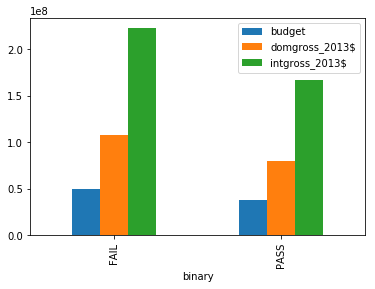

In [5]:
data[['binary','budget','domgross_2013$', 'intgross_2013$']].groupby('binary').mean().plot.bar()

In [20]:
data.loc[data['binary'] == 'PASS'][['year','budget']].head()

,year,budget
1,2012,45000000
7,2013,12000000
8,2013,13000000
10,2013,40000000
11,2013,25000000


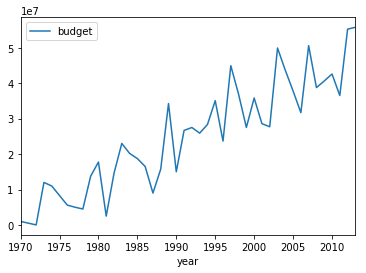

In [22]:
data.loc[data['binary'] == 'PASS'][['year','budget']].groupby('year').mean().plot.line()

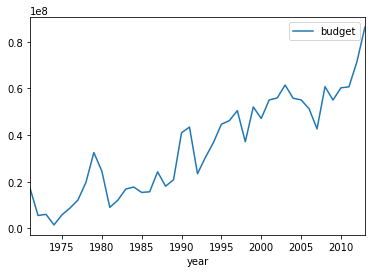

In [26]:
data.loc[data['binary'] == 'FAIL'][['year','budget']].groupby('year').mean().plot.line()

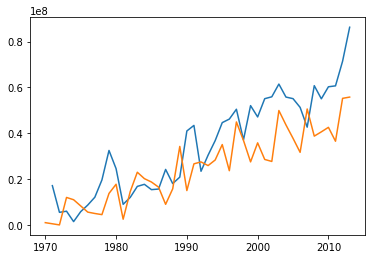

In [65]:
x_fail = sorted(data.year.unique())[1:]
y_fail = data.loc[data['binary'] == 'FAIL'][['year','budget']].groupby('year').mean()
x_pass = sorted(data.year.unique())
y_pass = data.loc[data['binary'] == 'PASS'][['year','budget']].groupby('year').mean()
f, ax = plt.subplots(1)
ax.plot(x_fail, y_fail)
del x_pass[1]
del x_pass[4]
#x_pass
#y_pass.loc[1971] = [0.0]
#y_pass.loc[1975] = [0.0]
#y_pass
ax.plot(x_pass, y_pass)

In [78]:
data[['year','binary','budget','domgross_2013$', 'intgross_2013$']].pivot_table(columns=[data.binary])

binary,FAIL,PASS
budget,5.041529e+07,3.792917e+07
domgross_2013$,1.077744e+08,7.959192e+07
intgross_2013$,2.225298e+08,1.673600e+08
year,2.001825e+03,2.003450e+03


In [79]:
data.pivot_table(columns=data.binary)

binary,FAIL,PASS
budget,5.041529e+07,3.792917e+07
budget_2013$,6.291156e+07,4.627417e+07
decade code,1.940835e+00,1.933599e+00
domgross,7.498519e+07,6.188565e+07
domgross_2013$,1.077744e+08,7.959192e+07
intgross,1.647366e+08,1.326719e+08
intgross_2013$,2.225298e+08,1.673600e+08
period code,2.429234e+00,2.409031e+00
year,2.001825e+03,2.003450e+03


In [68]:
data[['binary','budget','domgross_2013$', 'intgross_2013$']].groupby('binary').mean()

,budget,domgross_2013$,intgross_2013$
binary,,,
FAIL,5.041529e+07,1.077744e+08,2.225298e+08
PASS,3.792917e+07,7.959192e+07,1.673600e+08


In [88]:
A = data.loc[data['binary'] == 'PASS']
B = data.loc[data['binary'] == 'FAIL']

In [89]:
A.columns = pd.MultiIndex.from_product([['A'], A.columns])
B.columns = pd.MultiIndex.from_product([['B'], B.columns])
pd.concat([A, B], axis = 1)

A                                                          \
        year       imdb                           title         test   
0        NaN        NaN                             NaN          NaN   
1     2012.0  tt1343727                        Dredd 3D  ok-disagree   
2        NaN        NaN                             NaN          NaN   
3        NaN        NaN                             NaN          NaN   
4        NaN        NaN                             NaN          NaN   
5        NaN        NaN                             NaN          NaN   
6        NaN        NaN                             NaN          NaN   
7     2013.0  tt2194499                      About Time  ok-disagree   
8     2013.0  tt1814621                       Admission           ok   
9        NaN        NaN                             NaN          NaN   
10    2013.0  tt1800241                 American Hustle  ok-disagree   
11    2013.0  tt1322269            August: Osage County           ok   
12    2013.0  tt1559547             Beautiful Creatures           ok   
13    2013.0  tt2334873                    Blue Jasmine  ok-disagree   
14       NaN        NaN                             NaN          NaN   
15    2013.0  tt1939659                          Carrie           ok   
16       NaN        NaN                             NaN          NaN   
17    2013.0  tt1690953                 Despicable Me 2           ok   
18       NaN        NaN                             NaN          NaN   
19    2013.0  tt1535108                         Elysium  ok-disagree   
20       NaN        NaN                             NaN          NaN   
21    2013.0  tt0848537                            Epic  ok-disagree   
22    2013.0  tt0765446        Escape from Planet Earth           ok   
23       NaN        NaN                             NaN          NaN   
24    2013.0  tt1288558                       Evil Dead  ok-disagree   
25    2013.0  tt1905041              Fast and Furious 6  ok-disagree   
26    2013.0  tt2294629                          Frozen           ok   
27    2013.0  tt1583421           G.I. Joe: Retaliation  ok-disagree   
28       NaN        NaN                             NaN          NaN   
29    2013.0  tt2425486                          Gloria           ok   
...      ...        ...                             ...          ...   
1764     NaN        NaN                             NaN          NaN   
1765     NaN        NaN                             NaN          NaN   
1766  1976.0  tt0075249                         Sparkle           ok   
1767     NaN        NaN                             NaN          NaN   
1768     NaN        NaN                             NaN          NaN   
1769     NaN        NaN                             NaN          NaN   
1770     NaN        NaN                             NaN          NaN   
1771     NaN        NaN                             NaN          NaN   
1772     NaN        NaN                             NaN          NaN   
1773  1974.0  tt0071222                 Black Christmas           ok   
1774     NaN        NaN                             NaN          NaN   
1775     NaN        NaN                             NaN          NaN   
1776  1974.0  tt0071562          The Godfather: Part II           ok   
1777     NaN        NaN                             NaN          NaN   
1778     NaN        NaN                             NaN          NaN   
1779     NaN        NaN                             NaN          NaN   
1780     NaN        NaN                             NaN          NaN   
1781     NaN        NaN                             NaN          NaN   
1782     NaN        NaN                             NaN          NaN   
1783  1973.0  tt0070047                    The Exorcist           ok   
1784     NaN        NaN                             NaN          NaN   
1785     NaN        NaN                             NaN          NaN   
1786  1972.0  tt0069089                  Pink Flami